In [ ]:
Name : Sarvesh Harikant
Email : sarveshsh8@gmail.com
Phone : 7022410051

Github : https://github.com/Sarveshsh8/Perceptron

In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


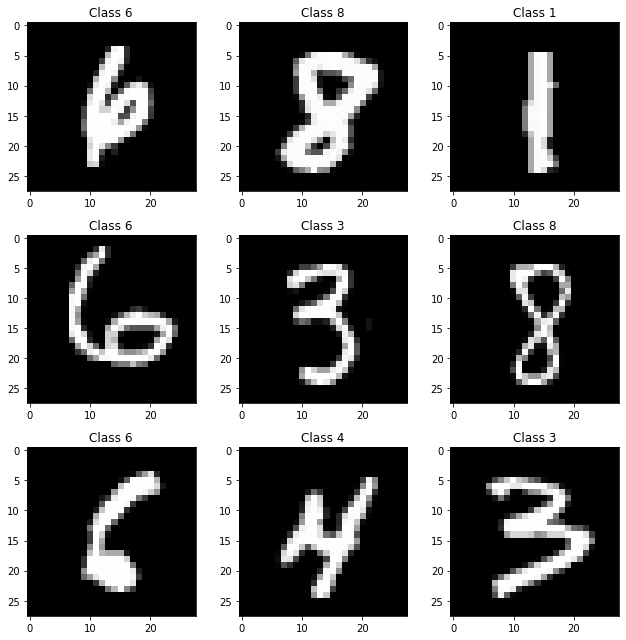

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    6   76  134  200  249  202  174  114   81   13    2    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0  0  0  157  254  254  254  232  231  254  254  255  254  194  162   17    0    0    0    0    0  0  0  0  0  
0  0  0  0  0  0   57  217  254  169    5    1   62  137  150  218  239  254  206   34    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    0   21  112 

In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1,validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 13s 26ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.0825 - val_accuracy: 0.9812
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0063 - accuracy: 0.9976 - val_loss: 0.0759 - val_accuracy: 0.9822
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0785 - val_accuracy: 0.9832
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0752 - val_accuracy: 0.9837
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0883 - val_accuracy: 0.9805
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.0761 - val_accuracy: 0.9835
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0791 - val_accuracy: 0.9834
Epoc

Text(0, 0.5, 'loss')

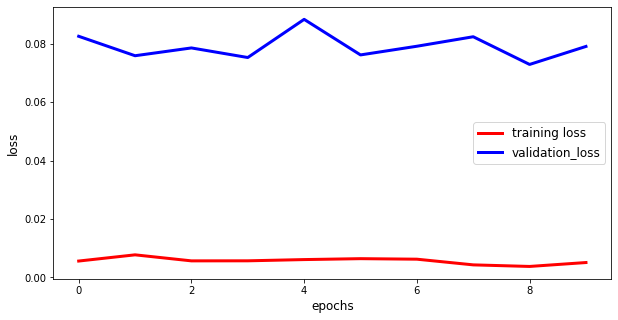

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], 'r', linewidth=3)
plt.plot(history.history['val_loss'], 'b', linewidth=3)
plt.legend(['training loss', 'validation_loss'], fontsize=12)
plt.xlabel('epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

157/157 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

